In [1]:
#Standard Data Packages
import pandas as pd
import numpy as np

#Visualization Packages
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = "darkgrid")

#Scikit
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

#Other Packages
import joblib

## Load Data

In [3]:
train_set = pd.read_csv("../data/train_norm_set.csv")
val_set = pd.read_csv("../data/val_norm_set.csv")

In [4]:
features = ["CreditScore", "Geography", "Gender", "Age", "Tenure", "Balance", "NumOfProducts", "HasCrCard", "IsActiveMember", "EstimatedSalary"]

X_train = train_set[features]
Y_train = train_set["Exited"]

X_val = val_set[features]
Y_val = val_set["Exited"]

## Logistic Regression Model

#### Fit and Evaluate on Train Data

Train set score: 0.825108419968318
Cross validation scores: [0.82472085 0.82307626 0.82247035 0.8271295  0.82557133 0.82678324
 0.82790859 0.82392659 0.82349377 0.82505194]
              precision    recall  f1-score   support

           0       0.84      0.96      0.90     91072
           1       0.67      0.34      0.45     24451

    accuracy                           0.83    115523
   macro avg       0.76      0.65      0.67    115523
weighted avg       0.81      0.83      0.80    115523



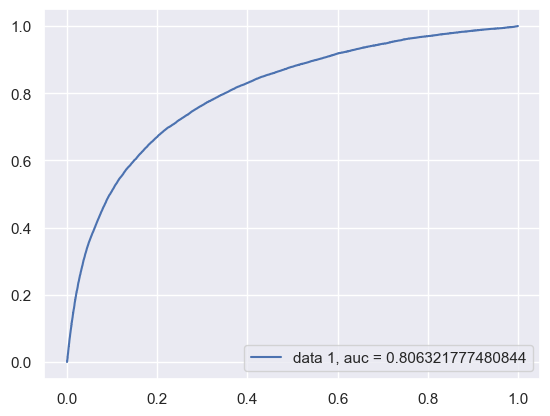

In [9]:
#build model
lr = LogisticRegression()

#fit on train data

#evaluate train result
lr.fit(X_train, Y_train)
print("Train set score: " + str(lr.score(X_train, Y_train)))

scores = cross_val_score(lr, X_train, Y_train, cv = 10)
print("Cross validation scores: " + str(scores))

#make predictions
predict_train = lr.predict(X_train)

#print metrics
print(metrics.classification_report(Y_train, predict_train))

#ROC Curve and AUC
y_pred_proba = lr.predict_proba(X_train)[:,1]
fpr, tpr, _ = metrics.roc_curve(Y_train,  y_pred_proba)
auc = metrics.roc_auc_score(Y_train, y_pred_proba)
plt.plot(fpr, tpr, label = "data 1, auc = " + str(auc))
plt.legend(loc = 4)

plt.show()

#### Make Predictions and Evaluate on Validation Data

              precision    recall  f1-score   support

           0       0.84      0.96      0.90     39041
           1       0.68      0.34      0.46     10470

    accuracy                           0.83     49511
   macro avg       0.76      0.65      0.68     49511
weighted avg       0.81      0.83      0.80     49511



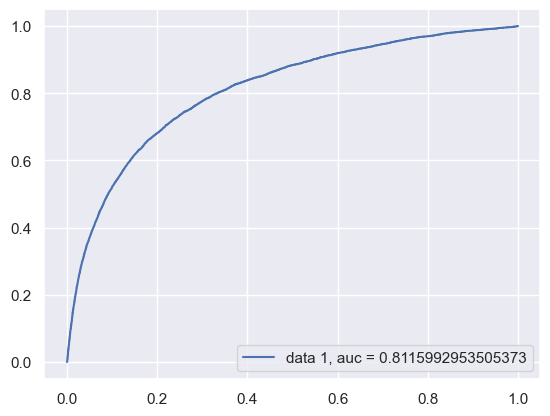

In [10]:
#evaluate on validation data
score_val = lr.score(X_val, Y_val)

#make predictions
predict_val = lr.predict(X_val)

#print metrics
print(metrics.classification_report(Y_val, predict_val))

#ROC Curve and AUC
y_pred_proba = lr.predict_proba(X_val)[:,1]
fpr, tpr, _ = metrics.roc_curve(Y_val,  y_pred_proba)
auc = metrics.roc_auc_score(Y_val, y_pred_proba)
plt.plot(fpr, tpr, label = "data 1, auc = " + str(auc))
plt.legend(loc = 4)

plt.show()

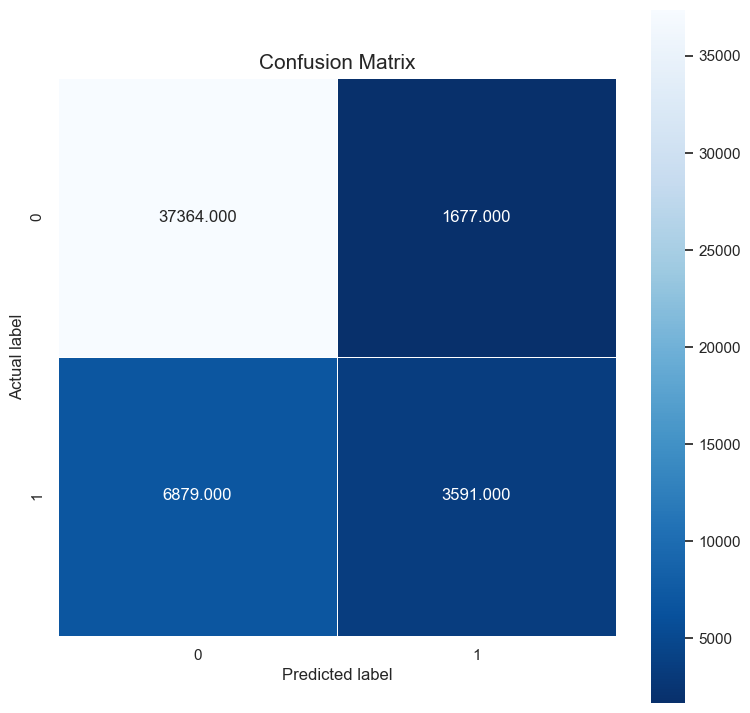

In [11]:
confusion_matrix = metrics.confusion_matrix(Y_val, predict_val)

plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrix, annot=True, fmt = ".3f", linewidths=.5, square = True, cmap = "Blues_r")
plt.ylabel("Actual label")
plt.xlabel("Predicted label")
plt.title("Confusion Matrix", size = 15)

plt.show()

## Logistic Regression Model (undersampled unbalanced dataset)

#### Load Dataset

In [5]:
train_norm_balanced = pd.read_csv('../data/train_norm_balanced.csv')

X_train_balanced = train_norm_balanced[features]
Y_train_balanced = train_norm_balanced["Exited"]

#### Fit and Evaluate on Train Data

Train set score: 0.7377407876978447
              precision    recall  f1-score   support

           0       0.74      0.74      0.74     24451
           1       0.74      0.73      0.74     24451

    accuracy                           0.74     48902
   macro avg       0.74      0.74      0.74     48902
weighted avg       0.74      0.74      0.74     48902



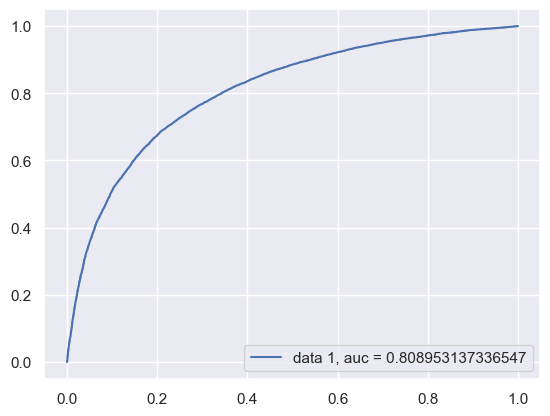

In [6]:
#build model
lr_balanced = LogisticRegression()

#fit on train data

#evaluate train result
lr_balanced.fit(X_train_balanced, Y_train_balanced)
print("Train set score: " + str(lr_balanced.score(X_train_balanced, Y_train_balanced)))

#make predictions
predict_train = lr_balanced.predict(X_train_balanced)

#print metrics
print(metrics.classification_report(Y_train_balanced, predict_train))

#ROC Curve and AUC
y_pred_proba = lr_balanced.predict_proba(X_train_balanced)[:,1]
fpr, tpr, _ = metrics.roc_curve(Y_train_balanced,  y_pred_proba)
auc = metrics.roc_auc_score(Y_train_balanced, y_pred_proba)
plt.plot(fpr, tpr, label = "data 1, auc = " + str(auc))
plt.legend(loc = 4)

plt.show()

#### Make Predictions and Evaluate on Validation Data

              precision    recall  f1-score   support

           0       0.91      0.75      0.82     39041
           1       0.44      0.74      0.55     10470

    accuracy                           0.75     49511
   macro avg       0.68      0.74      0.69     49511
weighted avg       0.81      0.75      0.77     49511



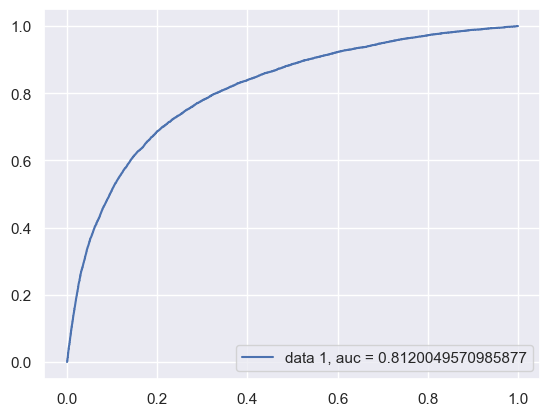

In [7]:
#evaluate on validation data
score_val = lr_balanced.score(X_val, Y_val)

#make predictions
predict_val = lr_balanced.predict(X_val)

#print metrics
print(metrics.classification_report(Y_val, predict_val))

#ROC Curve and AUC
y_pred_proba = lr_balanced.predict_proba(X_val)[:,1]
fpr, tpr, _ = metrics.roc_curve(Y_val,  y_pred_proba)
auc = metrics.roc_auc_score(Y_val, y_pred_proba)
plt.plot(fpr, tpr, label = "data 1, auc = " + str(auc))
plt.legend(loc = 4)

plt.show()

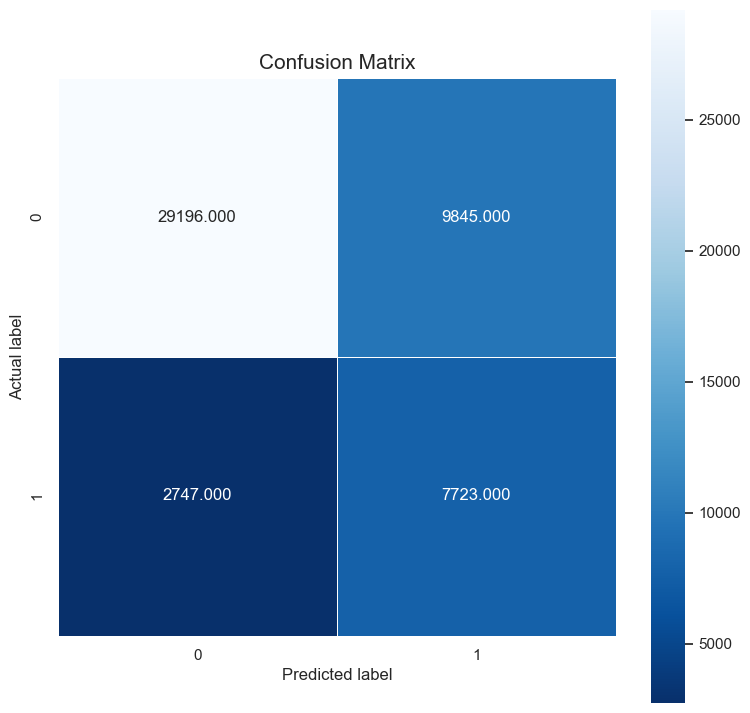

In [8]:
confusion_matrix = metrics.confusion_matrix(Y_val, predict_val)

plt.figure(figsize=(9,9))
sns.heatmap(confusion_matrix, annot=True, fmt = ".3f", linewidths=.5, square = True, cmap = "Blues_r")
plt.ylabel("Actual label")
plt.xlabel("Predicted label")
plt.title("Confusion Matrix", size = 15)

plt.show()

In [12]:
joblib.dump(lr, "../models/logistic_unbalanced.joblib") 
joblib.dump(lr_balanced, "../models/logistic_balanced.joblib") 

['../models/logistic_balanced.joblib']